In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
pd.set_option('display.max_columns', None)

In [5]:
secrets_file = open("secret.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [6]:
play_list =["37i9dQZF1DWWEJlAGA9gs0", "37i9dQZF1DWVmps5U8gHNv","37i9dQZF1DXd6tJtr4qeot", "37i9dQZF1DWWOaP4H0w5b0", "37i9dQZF1DXbITWG1ZJKYt","37i9dQZF1DWUrPBdYfoJvz", "37i9dQZF1DX0ItcQfwbKZJ", "37i9dQZF1DX26DKvjp0s9M", "37i9dQZF1DX9GRpeH4CL0S", "37i9dQZF1DX1GT5IIzDqMe", "37i9dQZF1DXatFAWyNT5ad","37i9dQZF1DX2L0iB23Enbq",'37i9dQZEVXbNG2KDcFcKOF','37i9dQZF1DWWvhKV4FBciw','37i9dQZF1DWZBCPUIUs2iR','37i9dQZF1DWZeKCadgRdKQ','37i9dQZF1DX4UtSsGT1Sbe','37i9dQZF1DXbTxeAdrVG2l','37i9dQZF1DWWQRwui0ExPn','37i9dQZF1DX3Kdv0IChEm9','37i9dQZF1DXccH49bh52dB','37i9dQZF1DXbtYAdenGE9U','37i9dQZF1DX202yvKb0g9m','37i9dQZF1DX4mnAzYEyRVc']

In [7]:
from random import randint
from time import sleep
all_tracks = []
for i in play_list:
    results = sp.user_playlist_tracks("spotify",i)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results) 
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) 
    all_tracks= all_tracks+tracks
    

In [8]:
from pandas import json_normalize
df_alltracks=json_normalize(all_tracks)[['track.artists','track.id','track.name','track.popularity']]
print(df_alltracks.shape)

(3256, 4)


In [9]:
artists_df = pd.DataFrame(columns=['external_urls.spotify','href', 'id', 'name', 'type', 'uri','song_id', 'song_name', 'popularity' ])
for i in df_alltracks.index:
    artists_for_song = json_normalize(df_alltracks.iloc[i]['track.artists'])
    artists_for_song['song_id']    = df_alltracks.iloc[i]['track.id']         
    artists_for_song['song_name']  = df_alltracks.iloc[i]['track.name']       
    artists_for_song['popularity'] = df_alltracks.iloc[i]['track.popularity'] 
    artists_df = pd.concat([artists_df, artists_for_song], axis=0)
no_feature_df = artists_df.reset_index(drop=True)
no_feature_df.shape

(4240, 9)

In [10]:
# I want to check the method to delete repeated songs where all the elements in the row are perfectly repeated in another row

duplicate_rows = no_feature_df[no_feature_df.duplicated()]
display(duplicate_rows.sort_values(by='song_name'))
4240-83

,external_urls.spotify,href,id,name,type,uri,song_id,song_name,popularity
2622,https://open.spotify.com/artist/40Yq4vzPs9VNUr...,https://api.spotify.com/v1/artists/40Yq4vzPs9V...,40Yq4vzPs9VNUrIBG5Jr2i,The Smashing Pumpkins,artist,spotify:artist:40Yq4vzPs9VNUrIBG5Jr2i,5QLHGv0DfpeXLNFo7SFEy1,1979 - Remastered 2012,78
2455,https://open.spotify.com/artist/32vWCbZh0xZ4o9...,https://api.spotify.com/v1/artists/32vWCbZh0xZ...,32vWCbZh0xZ4o9gkz4PsEU,Dolly Parton,artist,spotify:artist:32vWCbZh0xZ4o9gkz4PsEU,4w3tQBXhn5345eUXDGBWZG,9 to 5,80
1983,https://open.spotify.com/artist/3y2cIKLjiOlp1N...,https://api.spotify.com/v1/artists/3y2cIKLjiOl...,3y2cIKLjiOlp1Np37WiUdH,Shaboozey,artist,spotify:artist:3y2cIKLjiOlp1Np37WiUdH,2FQrifJ1N335Ljm3TjTVVf,A Bar Song (Tipsy),93
3776,https://open.spotify.com/artist/2TL8gYTNgD6nXk...,https://api.spotify.com/v1/artists/2TL8gYTNgD6...,2TL8gYTNgD6nXkyuUdDrMg,Jasmine Thompson,artist,spotify:artist:2TL8gYTNgD6nXkyuUdDrMg,3c8iiZGfEammKJuWTErE5x,Ain't Nobody (Loves Me Better) (feat. Jasmine ...,74
3775,https://open.spotify.com/artist/4bL2B6hmLlMWnU...,https://api.spotify.com/v1/artists/4bL2B6hmLlM...,4bL2B6hmLlMWnUEZnorEtG,Felix Jaehn,artist,spotify:artist:4bL2B6hmLlMWnUEZnorEtG,3c8iiZGfEammKJuWTErE5x,Ain't Nobody (Loves Me Better) (feat. Jasmine ...,74
...,...,...,...,...,...,...,...,...,...
2719,https://open.spotify.com/artist/5e4Dhzv426EvQe...,https://api.spotify.com/v1/artists/5e4Dhzv426E...,5e4Dhzv426EvQe3aDb64jL,Shania Twain,artist,spotify:artist:5e4Dhzv426EvQe3aDb64jL,1wb4P4F0sxAQ2KXrRvsx6n,You're Still The One,71
1990,https://open.spotify.com/artist/45dkTj5sMRSjrm...,https://api.spotify.com/v1/artists/45dkTj5sMRS...,45dkTj5sMRSjrmBSBeiHym,Tate McRae,artist,spotify:artist:45dkTj5sMRSjrmBSBeiHym,3rUGC1vUpkDG9CZFHMur1t,greedy,95
1975,https://open.spotify.com/artist/0PCCGZ0wGLizHt...,https://api.spotify.com/v1/artists/0PCCGZ0wGLi...,0PCCGZ0wGLizHt2KZ7hhA2,Artemas,artist,spotify:artist:0PCCGZ0wGLizHt2KZ7hhA2,2GxrNKugF82CnoRFbQfzPf,i like the way you kiss me,100
3767,https://open.spotify.com/artist/1lmU3giNF3CSbk...,https://api.spotify.com/v1/artists/1lmU3giNF3C...,1lmU3giNF3CSbkVSQmLpHQ,Surf Mesa,artist,spotify:artist:1lmU3giNF3CSbkVSQmLpHQ,62aP9fBQKYKxi7PDXwcUAS,ily (i love you baby) (feat. Emilee),76


4157

In [11]:
no_feature_df.drop_duplicates(inplace=True)

In [12]:
no_feature_df.shape

(4157, 9)

In [13]:
no_feature_df.isnull().sum()

external_urls.spotify    0
href                     0
id                       0
name                     0
type                     0
uri                      0
song_id                  0
song_name                0
popularity               0
dtype: int64

In [14]:
chunks = [(i, i+100) for i in range(0, len(no_feature_df), 100)]
chunks
audio_features_list = []
for chunk in chunks:
    id_list100 = no_feature_df['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)

In [15]:
features_df = json_normalize(audio_features_list)

In [16]:
features_df= features_df.reset_index(drop='first')

In [17]:
features_df.shape

(4157, 18)

In [18]:
features_df[features_df.isnull().any(axis=1)]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Because I'm having to rows of the song with features dataframe that are giving me null values (including the id) I will try to remove the same index from the songs without features dataframe, before chunking the features.
features_df.drop([2211,3104], inplace=True)
features_df.shape

(4155, 18)

In [20]:
num_features_df = features_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']]

In [25]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(num_features_df)
pd.DataFrame(X_prep,columns=num_features_df.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.382434,-1.060271,0.460436,-0.925156,0.824298,-0.120631,1.101329,1.052806,0.230330,-0.435860,-1.319175,-0.586708,0.247930
1,-1.382434,-1.060271,0.460436,-0.925156,0.824298,-0.120631,1.101329,1.052806,0.230330,-0.435860,-1.319175,-0.586708,0.247930
2,-1.588544,-1.162384,-1.483500,-1.848169,0.824298,-0.389743,1.359364,1.183176,-0.461145,-0.760504,0.578884,-0.667673,0.247930
3,-1.588544,-1.162384,-1.483500,-1.848169,0.824298,-0.389743,1.359364,1.183176,-0.461145,-0.760504,0.578884,-0.667673,0.247930
4,-1.312055,-1.476628,1.015846,-2.589759,-1.213154,-0.389743,1.354151,1.219389,-0.461145,-1.122040,0.316635,-0.213578,-2.067008


In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=18, random_state=11)
kmeans.fit(X_prep)

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=18, random_state=11)

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\benja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\benja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\benja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\benja\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

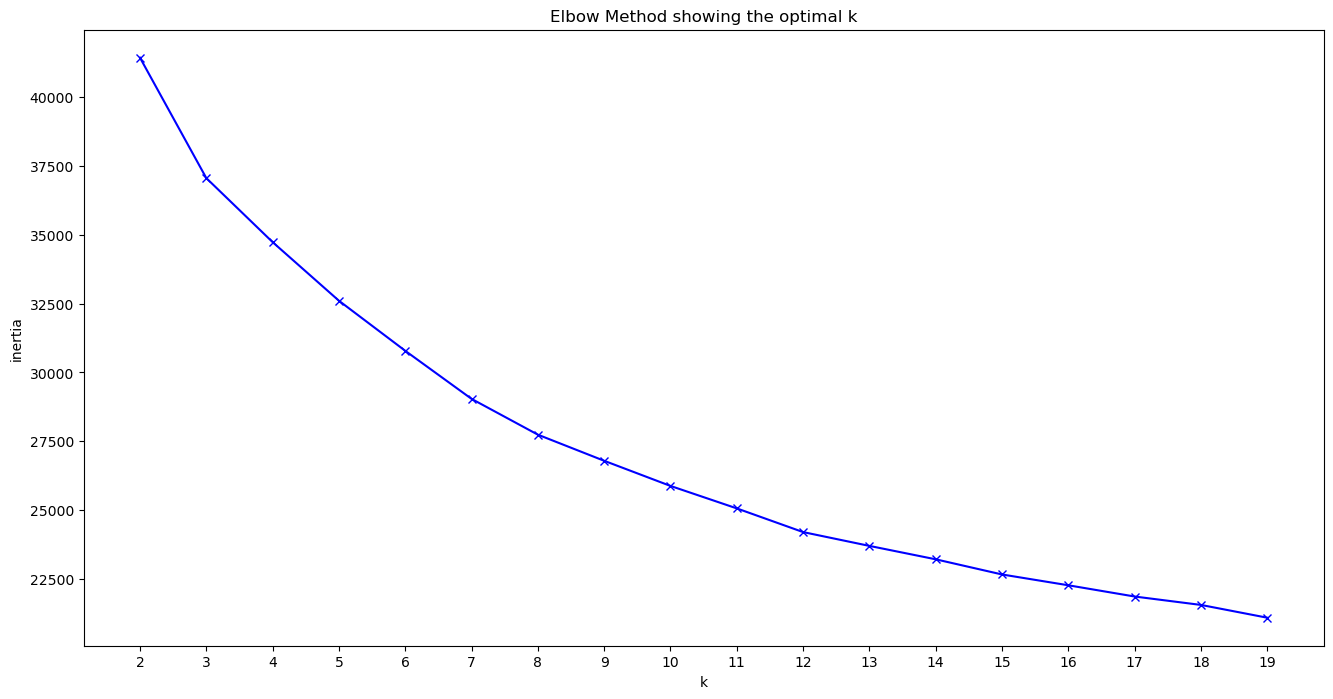

In [23]:
# import numpy as np
# K = range(2, 20)
# inertia = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=1234)
#     kmeans.fit(X_prep)
#     inertia.append(kmeans.inertia_)

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(16,8))
# plt.plot(K, inertia, 'bx-')
# plt.xlabel('k')
# plt.ylabel('inertia')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Elbow Method showing the optimal k')

#THE OPTIMAL IS THREE BUT THE SUGGESTION IS NOT ACCURATE WITH THREE CLUSTERS!

In [48]:
features_df['cluster'] = kmeans.labels_

In [49]:
features_df.cluster.unique()

array([ 3, 14, 11,  9, 17,  1,  2,  7,  8, 10, 15, 13,  0,  5,  4, 12,  6,
       16])

In [50]:
df_wft = pd.merge(left=no_feature_df,
                        right=features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')

In [51]:
df_wft.head()

,external_urls.spotify,href,id_x,name,type_x,uri_x,song_id,song_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type_y,id_y,uri_y,track_href,analysis_url,duration_ms,time_signature,cluster
0,https://open.spotify.com/artist/5aIqB5nVVvmFsv...,https://api.spotify.com/v1/artists/5aIqB5nVVvm...,5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,artist,spotify:artist:5aIqB5nVVvmFsvSdExz408,17i5jLpzndlQhbS4SrTd0B,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",70,0.275,0.157,7.0,-18.752,1.0,0.0636,0.890,0.842,0.186,0.304,73.289,audio_features,17i5jLpzndlQhbS4SrTd0B,spotify:track:17i5jLpzndlQhbS4SrTd0B,https://api.spotify.com/v1/tracks/17i5jLpzndlQ...,https://api.spotify.com/v1/audio-analysis/17i5...,152280.0,4.0,3
1,https://open.spotify.com/artist/5aIqB5nVVvmFsv...,https://api.spotify.com/v1/artists/5aIqB5nVVvm...,5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,artist,spotify:artist:5aIqB5nVVvmFsvSdExz408,17i5jLpzndlQhbS4SrTd0B,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",70,0.275,0.157,7.0,-18.752,1.0,0.0636,0.890,0.842,0.186,0.304,73.289,audio_features,17i5jLpzndlQhbS4SrTd0B,spotify:track:17i5jLpzndlQhbS4SrTd0B,https://api.spotify.com/v1/tracks/17i5jLpzndlQ...,https://api.spotify.com/v1/audio-analysis/17i5...,152280.0,4.0,3
2,https://open.spotify.com/artist/5Dl3HXZjG6ZOWT...,https://api.spotify.com/v1/artists/5Dl3HXZjG6Z...,5Dl3HXZjG6ZOWT5cV375lk,Yo-Yo Ma,artist,spotify:artist:5Dl3HXZjG6ZOWT5cV375lk,17i5jLpzndlQhbS4SrTd0B,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",70,0.275,0.157,7.0,-18.752,1.0,0.0636,0.890,0.842,0.186,0.304,73.289,audio_features,17i5jLpzndlQhbS4SrTd0B,spotify:track:17i5jLpzndlQhbS4SrTd0B,https://api.spotify.com/v1/tracks/17i5jLpzndlQ...,https://api.spotify.com/v1/audio-analysis/17i5...,152280.0,4.0,3
3,https://open.spotify.com/artist/5Dl3HXZjG6ZOWT...,https://api.spotify.com/v1/artists/5Dl3HXZjG6Z...,5Dl3HXZjG6ZOWT5cV375lk,Yo-Yo Ma,artist,spotify:artist:5Dl3HXZjG6ZOWT5cV375lk,17i5jLpzndlQhbS4SrTd0B,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",70,0.275,0.157,7.0,-18.752,1.0,0.0636,0.890,0.842,0.186,0.304,73.289,audio_features,17i5jLpzndlQhbS4SrTd0B,spotify:track:17i5jLpzndlQhbS4SrTd0B,https://api.spotify.com/v1/tracks/17i5jLpzndlQ...,https://api.spotify.com/v1/audio-analysis/17i5...,152280.0,4.0,3
4,https://open.spotify.com/artist/5aIqB5nVVvmFsv...,https://api.spotify.com/v1/artists/5aIqB5nVVvm...,5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,artist,spotify:artist:5aIqB5nVVvmFsvSdExz408,4SFBV7SRNG2e2kyL1F6kjU,"The Well-Tempered Clavier, Book 1, BWV 846-869...",62,0.234,0.126,0.0,-25.427,1.0,0.0446,0.989,0.896,0.102,0.216,133.998,audio_features,4SFBV7SRNG2e2kyL1F6kjU,spotify:track:4SFBV7SRNG2e2kyL1F6kjU,https://api.spotify.com/v1/tracks/4SFBV7SRNG2e...,https://api.spotify.com/v1/audio-analysis/4SFB...,139307.0,4.0,3


In [52]:
df_wft = df_wft.drop_duplicates()

In [53]:
# !pip3 install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [69]:
def fuzzy_match(user_input):
    cleaned_input = user_input.lower().strip()
    song_match = process.extractOne(cleaned_input, df_wft['song_name'], scorer=fuzz.token_sort_ratio)
    best_song_match = song_match[0]

    artist_match = process.extractOne(cleaned_input, df_wft['name'], scorer=fuzz.token_sort_ratio)
    best_artist_match = artist_match[0]

    if song_match[1] >= 70:
        # Filter songs based on the cluster number from the best song match
        cluster_number = df_wft.loc[df_wft['song_name'] == best_song_match, 'cluster'].iloc[0]
        matched_songs = df_wft[df_wft['cluster'] == cluster_number]
    elif artist_match[1] >= 70:
        # Filter songs based on the cluster number from the best artist match
        cluster_number = df_wft.loc[df_wft['name'] == best_artist_match, 'cluster'].iloc[0]
        matched_songs = df_wft[df_wft['cluster'] == cluster_number]
    else:
        return "Try with another artist or song."

    # Randomly select a song and its artist
    random_row = matched_songs.sample(n=1)
    matched_song_name = random_row['song_name'].iloc[0]
    matched_artist_name = random_row['name'].iloc[0]

    return f"Matched Song: {matched_song_name}\nMatched Artist: {matched_artist_name}"

user_input = input("Enter a song title or artist name: ")
result = fuzzy_match(user_input)
result

Enter a song title or artist name: Kendrick Lamar


'Matched Song: Freak On a Leash\nMatched Artist: Korn'

In [70]:
user_input = input("Enter a song title or artist name: ")
result = fuzzy_match(user_input)
result

Enter a song title or artist name: Johann Sebastian Bach


'Matched Song: Serenade in B-Flat Major, K. 361 "Gran Partita": III. Adagio\nMatched Artist: Wolfgang Amadeus Mozart'